* <h3>Import Basic Libraries </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
d=pd.read_csv("../input/cleandata/Cleandata.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
x = d.drop(columns=['City','Street','County','Airport_Code','Severity'])
y=d['Severity']


# Create a label encoder object
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in x.columns:
    # Compare if the dtype is object
    if x[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        x[col]=le.fit_transform(x[col])
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

* <h3> Find best parameters of ADA Boosting Classifier using Grid Search </h3>

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize the model
ada = AdaBoostClassifier(random_state=42)

# Initialize Grid Search
grid = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(x_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best score:  0.6498165924225551


* <h3> Train model using best performing parameters

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        35
           2       0.66      0.93      0.77     59003
           3       0.60      0.22      0.32     30754
           4       0.00      0.00      0.00      4494

    accuracy                           0.65     94286
   macro avg       0.32      0.29      0.27     94286
weighted avg       0.61      0.65      0.59     94286



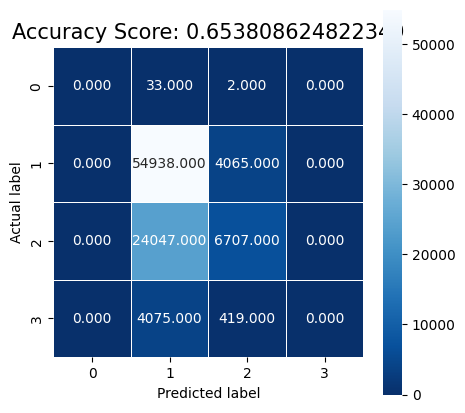

In [5]:
best_params = grid.best_params_
ada_best = AdaBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], random_state=42)

# Fit the model with the best parameters
ada_best.fit(x_train, y_train)

# Predict on the test set
y_pred = ada_best.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))
# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.savefig('Graphs/ADA.png')
plt.show()